In [1]:
import pandas as pd
import numpy as np
import fbprophet as fp
import matplotlib.pyplot as plt
import datetime


Bad key "text.kerning_factor" on line 4 in
C:\Users\Hyperbook\.conda\envs\timeseries\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
Importing plotly failed. Interactive plots will not work.


In [2]:
def read_language(filename):
    eng = pd.read_csv(filename)
    eng.head()
    colnames = eng['Title']
    index = pd.to_datetime(eng.columns[1:])
    eng = pd.DataFrame(np.array(eng[eng.columns[1:]]).T)
    eng.columns = colnames
    eng.index = index
    eng['Index'] = index
    eng.sort_values(by='Index',ascending=False,inplace=True)
    eng.drop('Index',axis=1,inplace=True)
    return eng

In [3]:
filename = 'English wiki stats.xls'
eng = read_language(filename)

In [33]:
df2 = pd.DataFrame([eng.iloc[eng.index>datetime.datetime(2019,1,1)].sum(axis=0).index,eng.iloc[eng.index>datetime.datetime(2019,1,1)].sum(axis=0).values]).T
df2.columns = 'Topic','VisitsIn2020'
df2.sort_values(by='VisitsIn2020',ascending=False,inplace=True)
filtered = df2[:100].Topic.values
eng[filtered]
# df2.sort_values()

Title,Coronavirus,Spanish flu,Coronavirus disease 2019,COVID-19 pandemic,Black Death,Elizabeth Holmes,Suicide methods,Sexual intercourse,Pandemic,Anthony Fauci,...,Alzheimer's disease,Plantar fasciitis,Guillain–Barré syndrome,Cellulitis,Atherosclerosis,Doxycycline,Leprosy,Jerome Adams,Typhoid fever,Down syndrome
2020-07-28,19434.0,22915.0,27459.0,71056.0,11311.0,4693.0,16225.0,10029.0,6355.0,32577.0,...,3785.0,4554.0,3514.0,4565.0,3442.0,4642.0,3817.0,1017.0,3544.0,2997.0
2020-07-27,19140.0,25396.0,27953.0,77744.0,11887.0,4631.0,16594.0,9830.0,6858.0,20562.0,...,3592.0,4522.0,3673.0,4691.0,4410.0,4345.0,4799.0,1493.0,3401.0,2990.0
2020-07-26,17357.0,26807.0,25181.0,72294.0,12128.0,5191.0,16604.0,9926.0,6102.0,21052.0,...,3417.0,4645.0,3355.0,4407.0,5010.0,3620.0,5968.0,1269.0,2855.0,2766.0
2020-07-25,17364.0,25812.0,24061.0,70696.0,10624.0,4479.0,16002.0,10196.0,5961.0,38379.0,...,3204.0,4936.0,3042.0,4316.0,4074.0,3702.0,4652.0,994.0,2818.0,2761.0
2020-07-24,18349.0,25028.0,25802.0,79918.0,10208.0,4255.0,15399.0,10060.0,6281.0,68827.0,...,3297.0,4513.0,3424.0,4551.0,3436.0,4470.0,3709.0,1882.0,2728.0,2867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-05,299.0,165.0,0.0,0.0,6263.0,2152.0,3012.0,13309.0,770.0,43.0,...,5289.0,3959.0,3765.0,3773.0,2499.0,2174.0,5154.0,0.0,4902.0,4604.0
2015-07-04,301.0,170.0,0.0,0.0,3492.0,1751.0,2930.0,12667.0,722.0,18.0,...,4549.0,3797.0,3150.0,3581.0,2587.0,2213.0,3968.0,0.0,4591.0,4456.0
2015-07-03,443.0,182.0,0.0,0.0,3948.0,3172.0,2818.0,12840.0,733.0,27.0,...,4590.0,4054.0,4038.0,3978.0,2977.0,2772.0,4101.0,0.0,5859.0,5497.0
2015-07-02,515.0,184.0,0.0,0.0,4815.0,4422.0,2851.0,12146.0,852.0,29.0,...,4814.0,4300.0,3924.0,3931.0,3256.0,3060.0,4150.0,0.0,5196.0,4983.0


In [39]:
# !pip install openpyxl
df2 = eng[filtered]
df2.to_excel('EnglishFiltered.xlsx')

In [60]:
# preprocessing - filter selection

filter_nulls = eng.columns[eng.isin([0,None,np.nan]).sum()/len(eng)>0.25]
filter_min25000year = eng.columns[eng.iloc[0:365].sum()>25000]


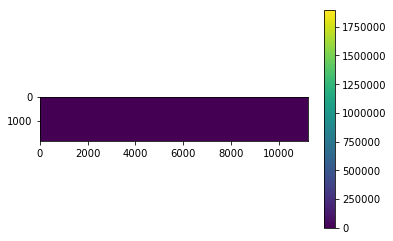

In [63]:
plt.imshow(eng[filter_min25000year.values],cmap='viridis')
plt.colorbar()


In [36]:

# eng.sort_values(by=)

KeyError: array(['2015-07-01T00:00:00.000000000', '2015-07-02T00:00:00.000000000',
       '2015-07-03T00:00:00.000000000', ...,
       '2020-07-26T00:00:00.000000000', '2020-07-27T00:00:00.000000000',
       '2020-07-28T00:00:00.000000000'], dtype='datetime64[ns]')